# Neutrino Oscillations 

Let's take a look at an maximum likelihood estimate example from neutrino physics. Neutrinos are very very light  particles that interact  very rarely with matter. We know from experiments (such as the T2K experiment in Japan) that neutrinos have a mass due to the fact they *oscillate* between the different types. 

In the T2K  experiment, neutrinos are  produced at the J-PARC accelerator in Tokai (in Japan) and travel 295km to the Super Kamiokande detector in Kamioka. 

Physicists can  detect neutrinos interacting  in the detector through the light they produce. We can predict how many neutrinos should be present a Kamioka as a function of their energy - know as the neutrino *flux*. In the file  `t2kflux_2013_sk_horn250kA.txt` we have the prediction for ranges of energies (in GeV).

In [1]:
#%matplotlib inline

import numpy,pandas
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = (15, 12)

flux = pandas.read_csv("t2kflux_2013_sk_horn250kA.txt",skiprows=1,delim_whitespace=True)
flux.drop(flux.index[0],inplace=True)
flux.head(194)

,Energy_min,Energy_max,numu,anti-numu,nue,anti-nue
1,0.30,0.35,475000.0,27700.0,5130.00,465.000
2,0.35,0.40,588000.0,28600.0,5580.00,492.000
3,0.40,0.45,713000.0,29200.0,5710.00,517.000
4,0.45,0.50,887000.0,28900.0,5840.00,538.000
5,0.50,0.55,1130000.0,29100.0,5680.00,568.000
...,...,...,...,...,...,...
190,9.75,9.80,334.0,30.2,4.43,1.900
191,9.80,9.85,326.0,25.5,3.74,1.340
192,9.85,9.90,304.0,28.5,4.61,2.220
193,9.90,9.95,316.0,31.9,2.95,0.894


Let's plot this flux as a bar chart. 

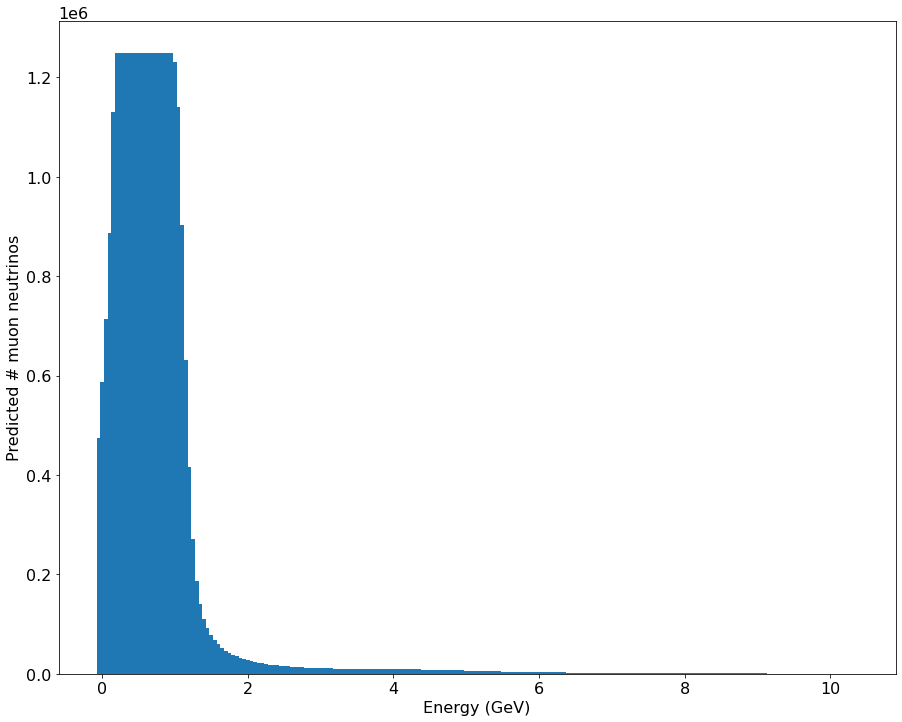

In [2]:
Energy_max = pandas.to_numeric(flux['Energy_min']).to_numpy()
Energy_min = pandas.to_numeric(flux["Energy_max"]).to_numpy()

Energy_centre = 0.5*(Energy_min+Energy_max)

# take a look at the predicted neutrino flux at T2K 
plt.bar(Energy_centre,flux["numu"])
plt.xlabel("Energy (GeV)")
plt.ylabel("Predicted # muon neutrinos")
plt.show()

Neutrinos interact very rarely in nature, meaning the probability that  one gets detected is very small. We've set this probability to 0.0001 (related to the cross-section) to see how many neutrino events we should detect if there were no oscilaltions. The  formula is 

$$
N_{\nu} = XS \times \mathrm{flux}
$$

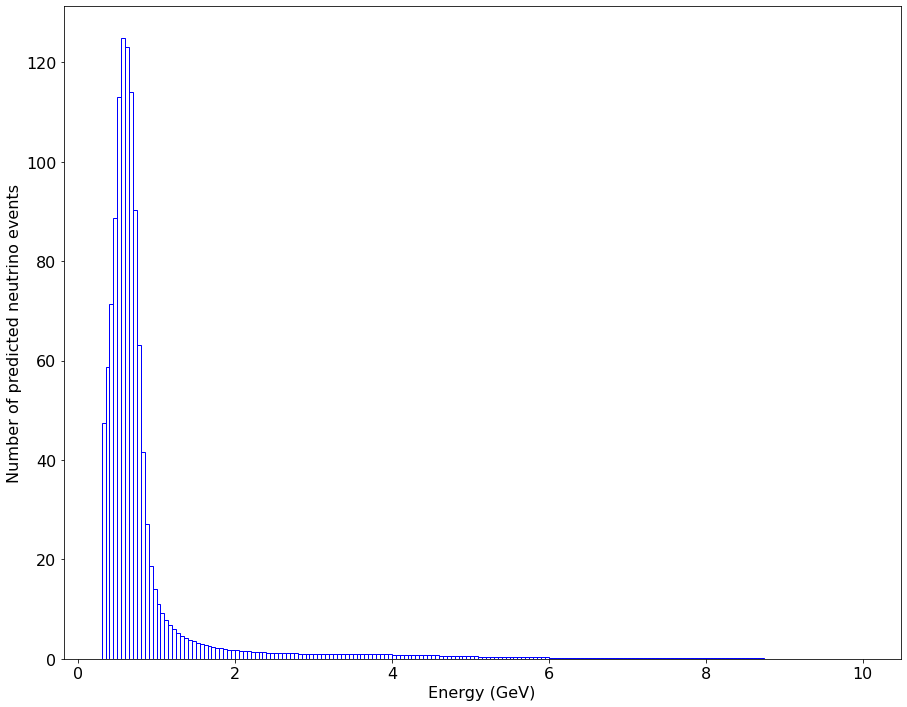

In [3]:
XS = 0.0001 # the probability that a neutrino interacts, the cross-section is very small

t2k_spectrum_no_oscillation  = [s*XS for s in flux['numu'].to_numpy()]
plt.bar( Energy_centre,t2k_spectrum_no_oscillation,fill=False,width=0.05,edgecolor='blue')
plt.xlabel("Energy (GeV)")
plt.ylabel("Number of predicted neutrino events")
plt.show()

We also have some data collected at the Super-K experiment in a file called `data_neutrinos.txt`. Let's take a look at the number of detected neutrinos for each energy bin and compare it to the predicted number $N_{\nu}$. 

In [4]:
data = pandas.read_csv("data_neutrinos.txt",delim_whitespace=True)
data.head()

,Energy_min,Energy_max,counts
0,0.30,0.35,33
1,0.35,0.40,35
2,0.40,0.45,25
3,0.45,0.50,12
4,0.50,0.55,6


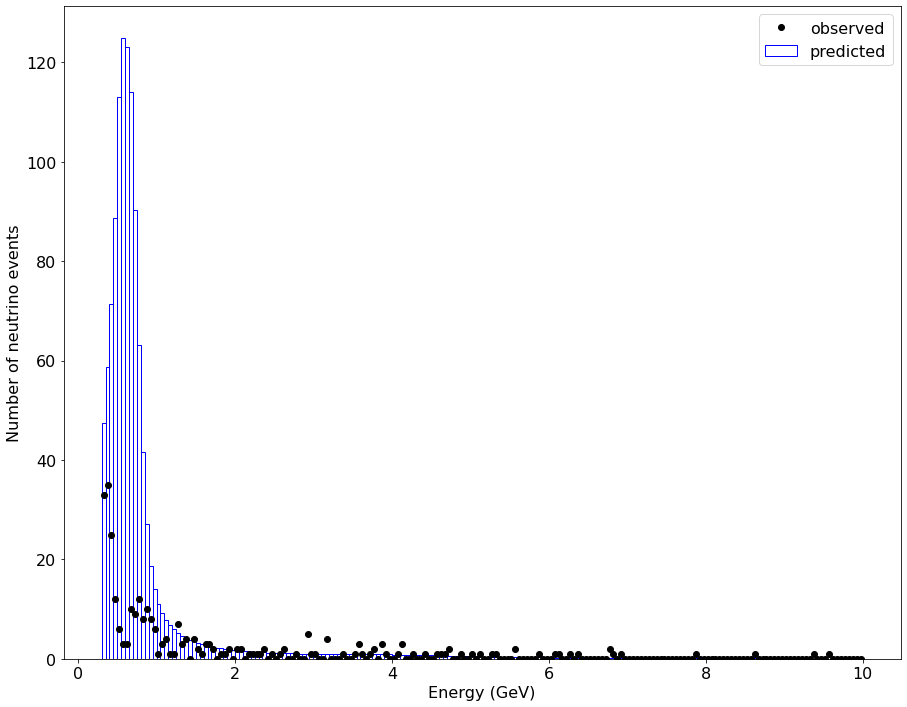

In [5]:
plt.bar( Energy_centre,t2k_spectrum_no_oscillation,fill=False,width=0.05,edgecolor='blue',label="predicted")
plt.plot(Energy_centre,data['counts'].to_numpy(),marker='o',linestyle = 'None',color='black',label="observed")
plt.xlabel("Energy (GeV)")
plt.ylabel("Number of neutrino events")
plt.legend()
plt.show()

Oh wow! Looks like the prediction doesn't match the data very well. The reason is that in nature, neutrinos oscillate between the different flavours (types). The data we had was for the number of *muon neutrinos* detected. These muon neutrinos will transform into the other types as they travel over the 295km distance so that we should have less neutrinos of the muon type at Super-K. 

From the theory, we can predict the probability that a muon neutrino will oscillate (and disappear from our detector). The probability that the neutrino survives as a muon neutrino is, 

$$
P(\nu_{\mu} \mathrm{survive}) = \sin^{2}(2\theta)\sin^{2}\left(1.27\frac{\Delta m^{2}  L}{E}\right)
$$

where $L$ is the distance travelled in km and E is the energy in GeV. Let's have a look at this quantity for different values  of the parameters $\sin^{2}(2\theta)$ and $\Delta m^{2}$ as a function of energy.


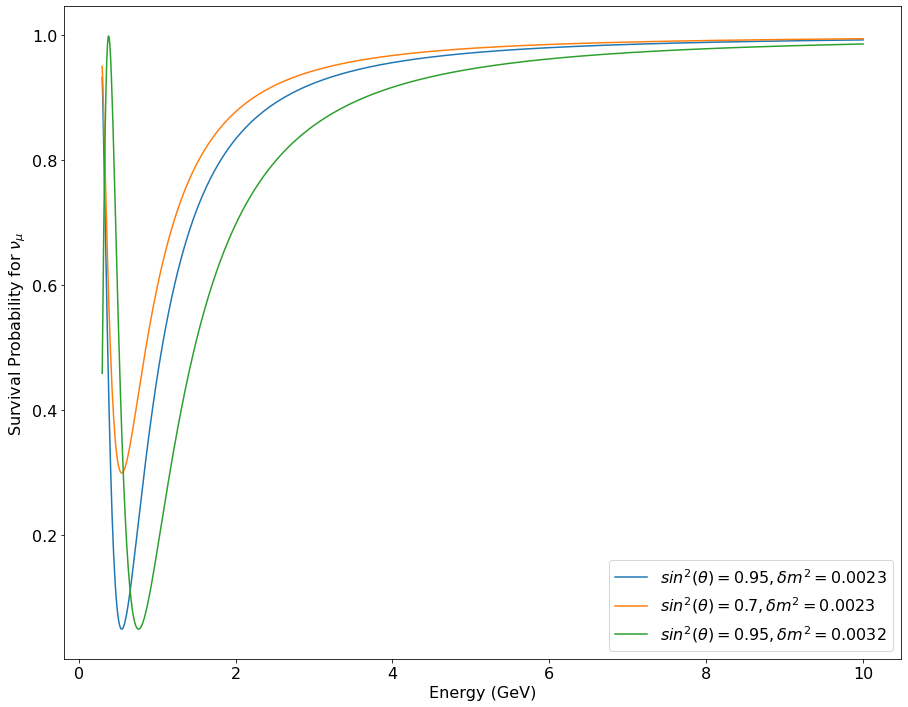

In [6]:
L = 295 # distance in km from j-PARC to Super-Kamiokanda

def probability_transfer(E,s2th,dm2):
    #s2th = (numpy.math.sin(2*theta))**2
    return 1-s2th*(numpy.math.sin(1.27*dm2*L/E))**2

xrange = numpy.linspace(0.3,10,1000)
plt.plot(xrange,[probability_transfer(E,0.95,2.3e-3) for E in xrange],label="$sin^{2}(\\theta)=%g,\delta m^{2}=%g$"%(0.95,2.3e-3))
plt.plot(xrange,[probability_transfer(E,0.7,2.3e-3) for E in xrange],label="$sin^{2}(\\theta)=%g,\delta m^{2}=%g$"%(0.7,2.3e-3))
plt.plot(xrange,[probability_transfer(E,0.95,3.2e-3) for E in xrange],label="$sin^{2}(\\theta)=%g,\delta m^{2}=%g$"%(0.95,3.2e-3))
plt.xlabel("Energy (GeV)")
plt.ylabel("Survival Probability for $\\nu_{\\mu}$")
plt.legend()
plt.show()

Since L is fixed for the T2K experiment, our  new formula for  the predicted number  of neutrinos will depend on the two parameters $\sin^{2}(2\theta)$ and $\Delta m^{2}$, and the energy $E$

$$
N_{\nu}(\sin^{2}(2\theta),\Delta m^{2},E) = XS \times \mathrm{flux}\times P(\nu_{\mu} \mathrm{survive}) 
$$

Let's see how this predicted spectrum would vary for different values of these parameters. 

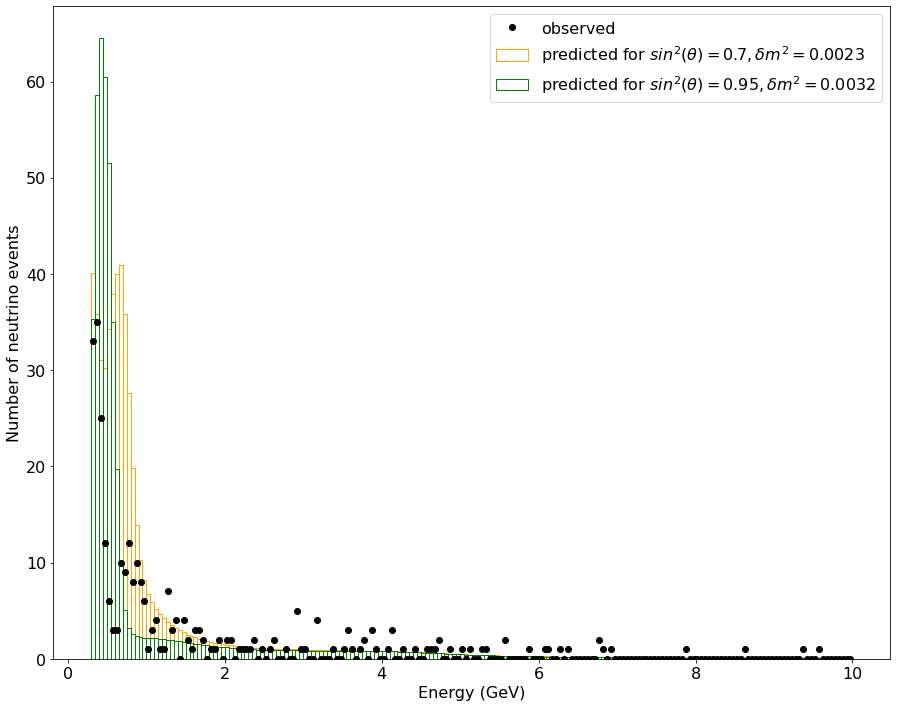

In [7]:
plt.bar( Energy_centre,t2k_spectrum_no_oscillation*numpy.array([probability_transfer(E,0.7,0.0023) for E in Energy_centre]),fill=False,width=0.05,edgecolor='orange',label="predicted for $sin^{2}(\\theta)=%g,\delta m^{2}=%g$"%(0.7,2.3e-3))
plt.bar( Energy_centre,t2k_spectrum_no_oscillation*numpy.array([probability_transfer(E,0.95,0.0032) for E in Energy_centre]),fill=False,width=0.05,edgecolor='green',label="predicted for $sin^{2}(\\theta)=%g,\delta m^{2}=%g$"%(0.95,3.2e-3))
plt.plot(Energy_centre,data['counts'].to_numpy(),marker='o',linestyle = 'None',color='black',label="observed")
plt.xlabel("Energy (GeV)")
plt.ylabel("Number of neutrino events")
plt.legend()
plt.show()

We can use maximum likelihood estimates to  measure the values  of $\sin^{2}(2\theta)$ and $\Delta m^{2}$ from our  data!

The data are binned in this  case so the likelihood will be based on Poisson random variables $k_{i}$,  where $i$ is the $i$-th bin.

The likelihood is, 

$$
L = \prod_{i}e^{N_{\nu,i}} N_{\nu,i}^{k_{i}}
$$

Where the observed number of events in bin-$i$ is $k_{i}$ and I'm ignoring the $k!$ terms as it just gives a constant in the likelihood. We'll use the bin centre for each bin to determine the  energy for  each bin. 

The negative log-likelihood is, 

$$
q = -\ln{L} = \sum_{i}  N_{\nu,i} - k_{i}\ln( N_{\nu,i})
$$

In [8]:
# define the negative log likelihood and minimize
from scipy.optimize import minimize

def neg_log_likelihood(x,args):
    s2th=x[0]
    dm2=x[1]
    data_x = numpy.array(args[0])

    predictions = t2k_spectrum_no_oscillation*numpy.array([probability_transfer(E,s2th,dm2) for E in Energy_centre])
    #print(predictions)
    return sum(predictions-data_x*numpy.log(predictions))


Next, we can see what the likelihood function looks like for our two parameters.  

Text(0.5, 0, '$\\Delta m^{2}$')

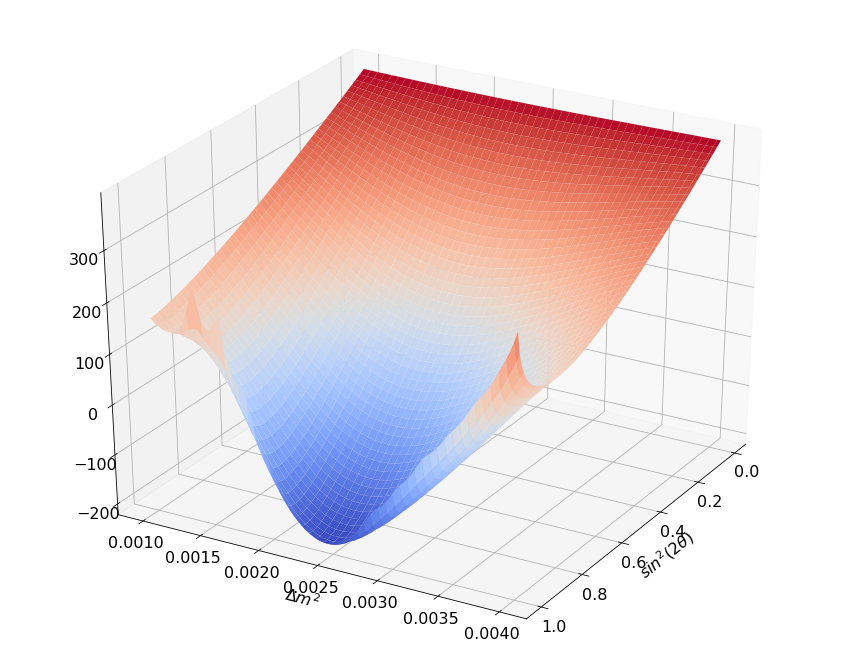

In [29]:
from matplotlib import cm

@numpy.vectorize
def neg_log_likelihood_simple(x,y):
    return neg_log_likelihood([x,y],args=[data['counts'].to_numpy()])

s2thetas   = numpy.linspace(0.01,0.999, 100)
deltams    = numpy.linspace(1e-3, 4e-3, 100)

X,Y = numpy.meshgrid(s2thetas,deltams)
logL = neg_log_likelihood_simple(X,Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.view_init(30, 30)
#contours = plt.contour(X, Y, logL, colors='black',levels=50)
#plt.clabel(contours, inline=True, fontsize=8)
ax.plot_surface(X, Y, logL,cmap=cm.coolwarm)
plt.xlabel("$sin^{2}(2\\theta)$")
plt.ylabel("$\Delta m^{2}$")

Let's use the `scipy.optimise` package to minimise $q$ to get the maximum likelihood estimators. 

In [10]:
bounds=[[0,1],[1e-3,5e-3]] # some reasonable bounds 

res = minimize(neg_log_likelihood,[0.8,2e-3],args=[data['counts'].to_numpy()],bounds=bounds)
print("Fitted values, sin^2(2*theta)=%.3f, delta(m)^2=%.5f"%(res.x[0],res.x[1]))

Fitted values, sin^2(2*theta)=0.977, delta(m)^2=0.00243


You can find recent results of these parameters have been measured at 
$\sin^{2}(2\theta)\approx 0.97$ and $\Delta(m)^{2}\approx 2.49e^{-3}$, so these are quite good. Let's also  compare the data now to the new predicted values using these oscillation parametrs, 

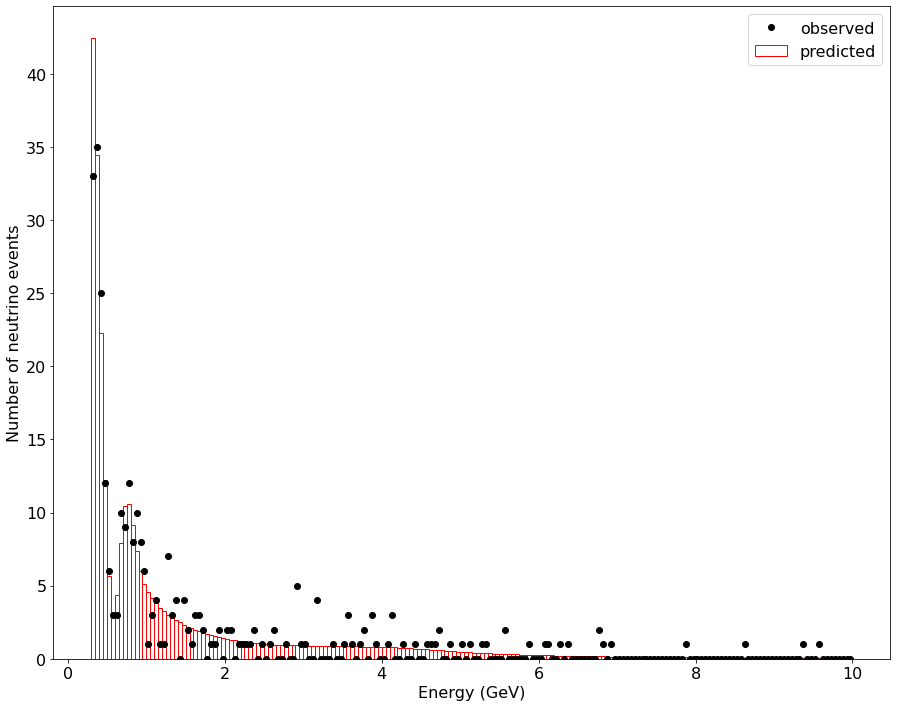

In [11]:
t2k_spectrum_fitted = t2k_spectrum_no_oscillation*numpy.array([probability_transfer(E,res.x[0],res.x[1]) for E in Energy_centre])

plt.bar(Energy_centre,t2k_spectrum_fitted,fill=False,width=0.05,edgecolor='red',label="predicted")
plt.plot(Energy_centre,data['counts'].to_numpy(),marker='o',linestyle = 'None',color='black',label="observed")
plt.xlabel("Energy (GeV)")
plt.ylabel("Number of neutrino events")
plt.legend()
plt.savefig("neutrino_oscillation_fit.pdf")
plt.show()

And we can also derive the profiled log-likelihood function in each of the two parameters. We can write new functions that fix one parameter and profile over the other. Note that we need to be very careful to find the true minimum since for values of $\sin^{2}(2\theta)$ close to 1, there are "wiggles" in the value of $q$ as we vary $\Delta m^{2}$.  We can set boundaries in each scan  to try to avoid those   wiggles.

[Text(0, 0.5, '$q(\\Delta m^{2},\\hat{sin^{2}(2\\theta)})$'),
 Text(0.5, 0, '$\\Delta m^{2}}$')]

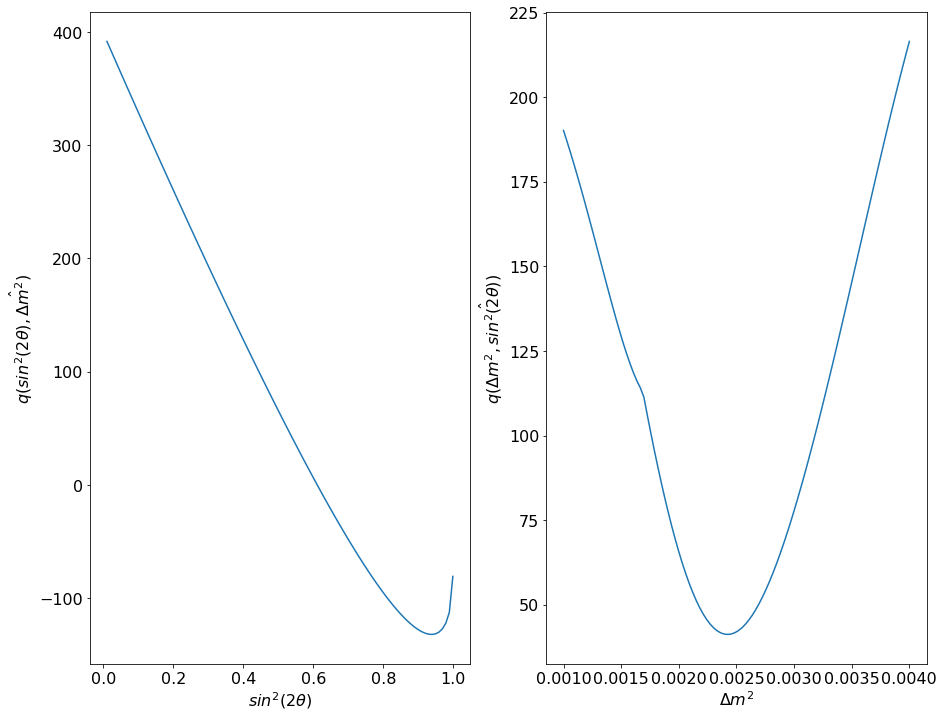

In [25]:
# fix sin^{2}(2theta) and minimise wrt delta m^2
def neg_log_likelihood_fix_s2th(x,args):
    deltam2=x[0]
    s2th = args[0]
    return neg_log_likelihood([s2th,deltam2], args=args[1])

profiled_log_s2th = []
values_dm2 = []
for x in s2thetas:
    res = minimize(neg_log_likelihood_fix_s2th,[2.3e-3],bounds=[[2e-3,5e-3]],args=[x,data['counts'].to_numpy()])
    profiled_log_s2th.append(neg_log_likelihood_simple(x,res.x[0]))
    values_dm2.append(res.x[0])


# fix delta m^2 and minimise wrt sin^{2}(2theta)
def neg_log_likelihood_fix_deltam2(x,args):
    s2th=x[0]
    deltam2 = args[0]
    return neg_log_likelihood([s2th,deltam2], args=args[1])

    
profiled_log_dm = []
for x in deltams:
    res = minimize(neg_log_likelihood_fix_deltam2,[0.9],bounds=[[0.5,1]],args=[x,data['counts'].to_numpy()])
    profiled_log_dm.append(neg_log_likelihood_simple(res.x[0],x))

    
fig, ax = plt.subplots(1,2)
ax[0].plot(s2thetas,profiled_log_s2th)
ax[0].set(xlabel="$sin^{2}(2\\theta)$",ylabel="$q(sin^{2}(2\\theta),\hat{\Delta m^{2}})$")

ax[1].plot(deltams,profiled_log_dm)
ax[1].set(xlabel="$\Delta m^{2}}$",ylabel="$q(\Delta m^{2},\hat{sin^{2}(2\\theta)})$")
